The contents of this course including lectures, labs, homework assignments, and exams have all been adapted from the [Data 8 course at University California Berkley](https://data.berkeley.edu/education/courses/data-8). Through their generosity and passion for undergraduate education, the Data 8 community at Berkley has opened their content and expertise for other universities to adapt in the name of undergraduate education.

In [1]:
#!pip install datascience
from datascience import *
import numpy as np

from IPython.display import display, Math, Latex

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chapter 14: Why the Mean Matters

In this chapter, we will study means and what we can say about them with only minimal assumptions about the underlying populations. Question that we will address include:

   * What exactly does the mean measure?

   * How close to the mean are most of the data?

   * How is the sample size related to the variability of the sample mean?

   * Why do empirical distributions of random sample means come out bell shaped?

   * How can we use sample means effectively for inference?

The average or mean of a collection of numbers is the sum of all the elements of the collection, divided by the number of elements in the collection.

In [2]:
not_symmetric = make_array(2, 3, 3, 9)

In [3]:
np.average(not_symmetric)

4.25

In [4]:
np.mean(not_symmetric)

4.25

In [5]:
np.mean(make_array(1, 1, 1, 0))

0.75

In [6]:
np.mean(make_array(True, True, True, False))

0.75

The mean of the collection {2, 3, 3, 9} is 4.25, which is not the “halfway point” of the data. So then what does the mean measure?

To see this, notice that the mean can be calculated in different ways.


\begin{split}\begin{align*}
\mbox{mean} ~ &=~ 4.25 \\ \\
&=~ \frac{2 + 3 + 3 + 9}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{2}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot 0.25 ~~ + ~~ 3 \cdot 0.5 ~~ + ~~ 9 \cdot 0.25
\end{align*}\end{split}

* When we calculate the mean, each distinct value in the collection is weighted by the proportion of times it appears in the collection.
* The mean of a collection depends only on the distinct values and their proportions. 
* If two collections have the same distribution, then they have the same mean.

For example, here is another collection that has the same distribution as not_symmetric and hence the same mean.

In [7]:
not_symmetric

array([2, 3, 3, 9], dtype=int64)

In [8]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

The mean is the center of gravity or balance point of the histogram.

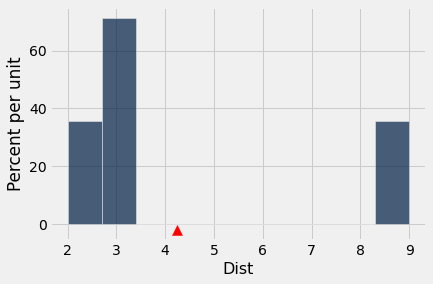

In [9]:
Table().with_column("Dist", same_distribution).hist()
plots.scatter(np.mean(same_distribution), -0.02, color='red', s=100, zorder=10, marker = "^");

The table fc2020 contains salary and benefits data for Fort Collins City employees in 2020.

In [10]:
fc2020 = Table.read_table('2020_Fort_Collins_City_Employee_Base_Pay.csv')

C:\Users\ksorauf\AppData\Local\Continuum\anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


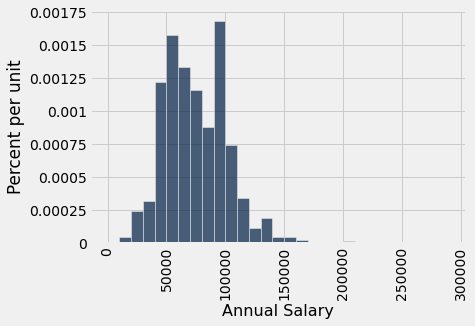

In [11]:
fc_bins = np.arange(0, 300000, 10000)
fc2020.select('Annual Salary').hist(bins=fc_bins)

This histogram is skewed to the right; it has a right-hand tail.


In general, **if the histogram has a tail on one side (the formal term is “skewed”), then the mean is pulled away from the median in the direction of the tail.**

In [12]:
compensation = fc2020.column('Annual Salary')
percentile(50, compensation)

71847.03

In [13]:
np.mean(compensation)

75006.85153724247

Distributions of incomes of large populations tend to be right skewed. When the bulk of a population has middle to low incomes, but a very small proportion has very high incomes, the histogram has a long, thin tail to the right.

That is why economists often summarize income distributions by the median instead of the mean.

### Variability

The mean tells us where a histogram balances. But in most every histograms values spread out on both sides of the mean. How far from the mean can they be? To answer this question, we will develop a measure of variability about the mean.

In [14]:
any_numbers = make_array(1, 2, 2, 10)

The goal is to measure roughly how far off the numbers are from their average. To do this, we first need the average:

In [15]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

In [16]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


To calculate roughly how big the deviations are, it is natural to compute the mean of the deviations. But something interesting happens when all the deviations are added together:

In [17]:
sum(deviations)

0.0

**The sum of the deviations from average is zero.**

What we really want to know is roughly how big the deviations are, regardless of whether they are positive or negative. So we need a way to eliminate the signs of the deviations.

There are two time-honored ways of losing signs: the absolute value, and the square. It turns out that taking the square is better because it places a larger emphasis on outliers and values that deviate more from the mean.

So let’s eliminate the signs by squaring all the deviations. Then we will take the mean of the squares:

In [18]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [19]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance: The mean squared deviation calculated above is called the variance of the values.**

While the variance does give us an idea of spread, it is not on the same scale as the original variable as its units are the square of the original. This makes interpretation very difficult.

So we return to the original scale by taking the positive square root of the variance:

In [20]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

The quantity that we have just computed is called the standard deviation of the list, and is abbreviated as SD. It measures roughly how far the numbers on the list are from their average.

**Definition. The SD of a list is defined as the root mean square of deviations from average.** That’s a mouthful. But read it from right to left and you have the sequence of steps in the calculation.

In [21]:
np.std(any_numbers)

3.6314597615834874



The table nba13 contains data on the players in the National Basketball Association (NBA) in 2013. For each player, the table records the position at which the player usually played, his height in inches, his weight in pounds, and his age in years.

In [22]:
nba13 = Table.read_table('nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


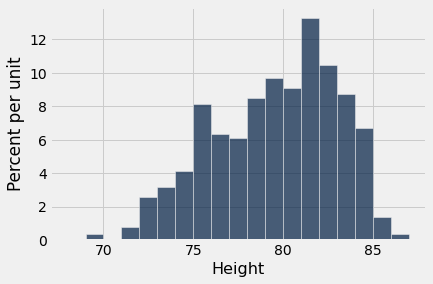

In [23]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

In [24]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

In [25]:
mean_height/12

6.58877887788779

About how far off are the players’ heights from the average? This is measured by the SD of the heights, which is about 3.45 inches.

In [26]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

In [27]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


In [29]:
87/12

7.25

Thabeet was tallest player and about 8 inches above the average height.

In [28]:
87 - mean_height

7.934653465346528

Which is about 2.3 SD from the mean

In [30]:
(87 - mean_height)/sd_height

2.2995015194397923

Isaiah Thomas was one of the two shortest NBA players in 2013. His height was about 2.9 SDs below average.

In [31]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [33]:
69/12

5.75

In [32]:
(69 - mean_height)/sd_height

-2.9169868288775844

What we have observed is that the tallest and shortest players were both just a few SDs away from the average height. This is an example of why the SD is a useful measure of spread. No matter what the shape of the histogram, the average and the SD together tell you a lot about where the histogram is situated on the number line.

The Russian mathematician [Pafnuty Chebychev](https://en.wikipedia.org/wiki/Pafnuty_Chebyshev) (1821-1894) proved a result that makes our rough statements precise.

For all lists, and all numbers the proportion of entries that are in the range “average SDs” is at least  


$1 - 1/z^2$

What makes the result powerful is that it is true for all lists – all distributions, no matter how irregular.

Specifically, it says that for every list:

* the proportion in the range “average 2 SDs” is at least 1 - 1/4 = 0.75

* the proportion in the range “average 3 SDs” is at least 1 - 1/9 ~ 0.89

* the proportion in the range “average 4.5 SDs” is at least 1 - 1/4.5^2 ~ 0.95

### Standard Units

In the calculations above, ***z*** measures standard units, the number of standard deviations above average.

No matter what the distribution of the list looks like, Chebychev’s bounds imply that standard units will typically be in the (-5, 5) range.

z = (value - average) / SD

As we will see, standard units are frequently used in data analysis. So it is useful to define a function that converts an array of numbers to standard units.

In [34]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

### Example United Flights
As we saw in an earlier section, the table united contains a column Delay consisting of the departure delay times, in minutes, of over thousands of United Airlines flights in the summer of 2015. We will create a new column called Delay (Standard Units) by applying the function standard_units to the column of delay times. This allows us to see all the delay times in minutes as well as their corresponding values in standard units.

In [35]:
united = Table.read_table('united.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [41]:
united.sort('Delay', descending=False)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/6/15,525,IAD,-16,-0.827203
8/23/15,587,PDX,-16,-0.827203
6/20/15,464,PDX,-15,-0.801874
8/22/15,1723,KOA,-14,-0.776545
6/4/15,721,EWR,-13,-0.751216
6/11/15,468,PHX,-13,-0.751216
6/27/15,273,SEA,-13,-0.751216
6/30/15,331,DEN,-13,-0.751216
7/4/15,614,SNA,-13,-0.751216
7/10/15,330,AUS,-13,-0.751216


ut something rather alarming happens when we sort the delay times from highest to lowest. The standard units that we can see are extremely high!

What this shows is that it is possible for data to be many SDs above average (and for flights to be delayed by almost 10 hours). The highest value of delay is more than 14 in standard units.

In [37]:
580/60

9.666666666666666

However, the proportion of these extreme values is small, and Chebychev’s bounds still hold true.

In [38]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

That is about 98%, as computed above, consistent with Chebychev’s bound of “at least 89%”.

In [39]:
1-(1/3**2)

0.8888888888888888

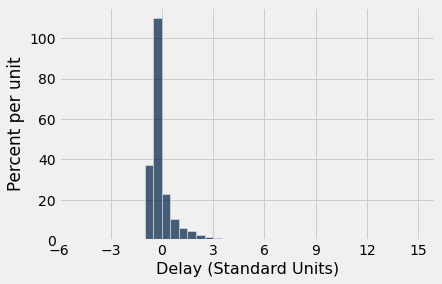

In [40]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

Let us look at the distribution of heights of mothers in our familiar sample of 1,174 mother-newborn pairs. The mothers’ heights have a mean of 64 inches and an SD of 2.5 inches. Unlike the heights of the basketball players, the mothers’ heights are distributed fairly symmetrically about the mean in a bell-shaped curve.

In [42]:
baby = Table.read_table('baby.csv')

In [43]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [44]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

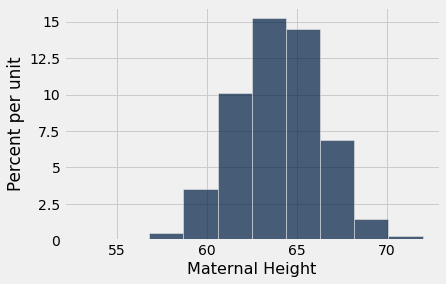

In [45]:
baby.hist('Maternal Height')

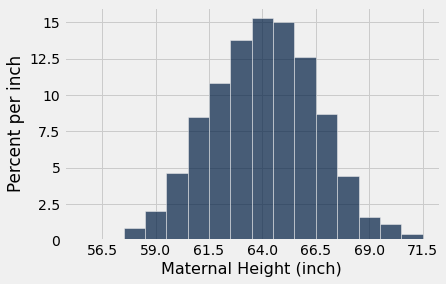

In [50]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

In [47]:
positions

array([56.5, 59. , 61.5, 64. , 66.5, 69. , 71.5])

In [48]:
np.arange(-3, 3.1, 1)

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

To see how the SD is related to the curve, start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an “upside-down cup” to a “right-way-up cup”; formally, the curve has a point of inflection. That point is one SD above average. It is the point ***z=1***, which is “average plus 1 SD” = 66.5 inches. Symmetrically on the left-hand side of the mean, the point of inflection is at ***z=-1***, that is, “average minus 1 SD” = 61.5 inches.

* For bell-shaped distributions the SD is the distance between the mean and the points of inflection on either side.

### Standard Normal Curve

$\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty$

<img src="SD_and_the_Normal_Curve_11_0.png" width=600 height=600 />

Here are some properties of the curve. Some are apparent by observation, and others require a considerable amount of mathematics to establish.

   * The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

   * The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

   * The points of inflection of the curve are at -1 and +1.

   * If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve.

In [51]:
from scipy import stats

Let us use this function to find the area to the left of under the standard normal curve.

<img src="SD_and_the_Normal_Curve_16_0.png" width=600 height=600 />

In [52]:
stats.norm.cdf(1)

0.8413447460685429

<img src="SD_and_the_Normal_Curve_20_0.png" width=600 height=600 />

In [53]:
1 - stats.norm.cdf(1)

0.15865525393145707

<img src="SD_and_the_Normal_Curve_23_0.png" width=600 height=600 />

In [54]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

<img src="SD_and_the_Normal_Curve_27_0.png" width=600 height=600 />

In [55]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [56]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

If a histogram is roughly bell shaped, the proportion of data in the range “average 2 SDs” is about 95%.

That is quite a bit more than Chebychev’s lower bound of 75%. Chebychev’s bound is weaker because it has to work for all distributions. If we know that a distribution is normal, we have good approximations to the proportions, not just bounds.

The table below compares what we know about all distributions and about normal distributions.

<img src="SD_table.png" width=600 height=600 />

### Central Limit Theorem

#### Roulette

We will play a game of Roulette. A winning bet pays even money, 1 to 1. We define a function red_winnings that returns the net winnings on one $1 bet on red. Specifically, the function takes a color as its argument and returns 1 if the color is red. For all other colors it returns -1.

In [57]:
wheel = Table.read_table('wheel.csv')
wheel

Pocket,Color
0,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [58]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [59]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


Your net gain on one red bet is one random draw from the Winnings: Red column.  You have a 18/38 Change of winning and 20/38 chance of loosing

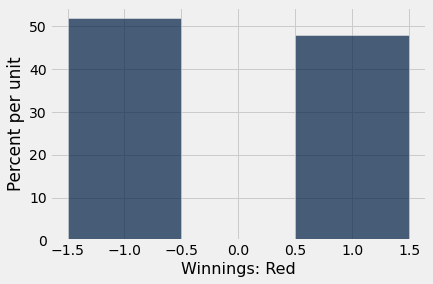

In [60]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

Now suppose you bet many times on red. Your net winnings will be the sum of many draws made at random with replacement from the distribution above.

In [61]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

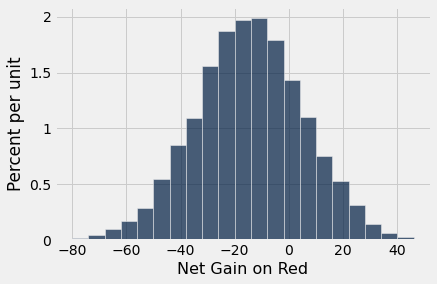

In [62]:
results.hist(bins=np.arange(-80, 50, 6))

That’s a roughly bell shaped histogram, even though the distribution we are drawing from is nowhere near bell shaped.

The distribution is centered near -20 dollars.

In [63]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [64]:
400 * average_per_bet

-21.052631578947366

In [65]:
np.mean(results.column(0))

-15.477

In [66]:
np.std(results.column(0))

20.045420200135492

### United Flight Data

The table *united* contains data on departure delays of 13,825 United Airlines domestic flights out of San Francisco airport in the summer of 2015. As we have seen before, the distribution of delays has a long right-hand tail.

In [67]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


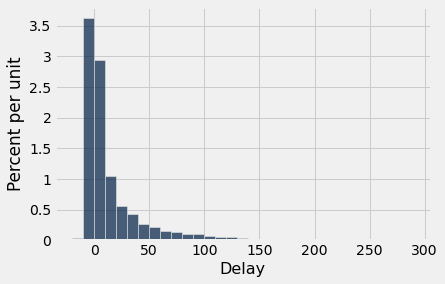

In [68]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [69]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

Suppose we sampled 400 delays at random with replacement. We could sample without replacement but the results would be very similar to with-replacement sampling.

In [70]:
400/13825*100

2.8933092224231465

In [71]:
delay = united.select('Delay')

In [72]:
np.mean(delay.sample(400).column('Delay'))

19.1325

In [73]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Size: 400', means
)

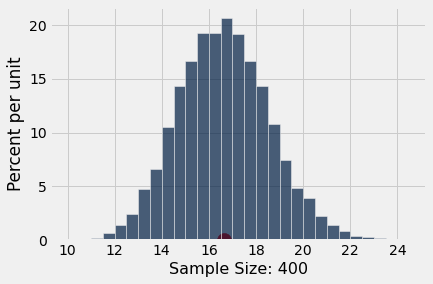

In [74]:
results.hist(bins=np.arange(10, 25, 0.5))
plots.scatter(mean_delay, 0, color='red', s=200);

The reason why the bell shape appears in such settings is due to a theory called the ***Central Limit Theorem***.

**The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.**

As we noted when we were studying Chebychev’s bounds, results that can be applied to random samples regardless of the distribution of the population are very powerful, because in data science we rarely know the distribution of the population.

The Central Limit Theorem makes it possible to make inferences with very little knowledge about the population, provided we have a large random sample. That is why it is central to the field of statistical inference.

How would this distribution change if we increased the sample size? 

In [75]:
results2 = make_array()

sample_size = 1200
repetitions= 10000
for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = new_mean = np.mean(sample.column('Delay'))
    results2 = np.append(results2, new_mean)
    
results = results.with_column('Sample  Size: 1200', results2)

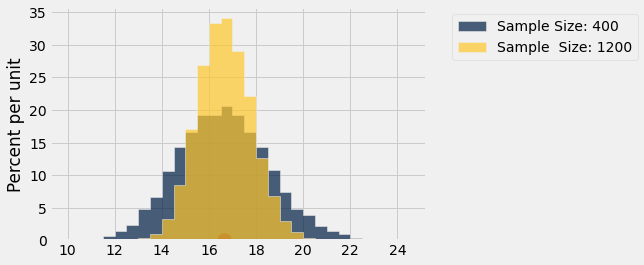

In [76]:
results.hist(bins=np.arange(10, 25, 0.5))
plots.scatter(mean_delay, 0, color='red', s=200);

Both distributions are approximately normal but one is narrower than the other. The proportions based on a sample size of 1200 are more tightly clustered around 16.65 than those from a sample size of 400. Increasing the sample size has decreased the variability in the sample proportion.

A larger sample size generally reduces the variability of a statistic.

In our simulations, we noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. Next, we will quantify the variability of the sample mean and develop a relation between the variability and the sample size.

Now let’s take random samples and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

We will define a function simulate_sample_mean to do this, because we are going to vary the sample size later. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

In [77]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.635133
Population SD: 39.480199851609314
SD of sample means: 3.9286029580896824


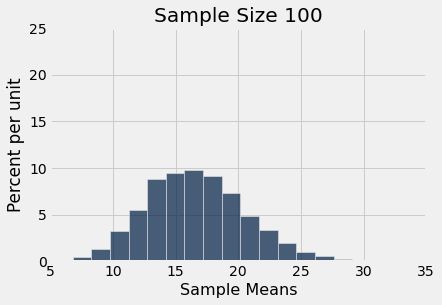

In [79]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.6444875
Population SD: 39.480199851609314
SD of sample means: 1.9480358347817297


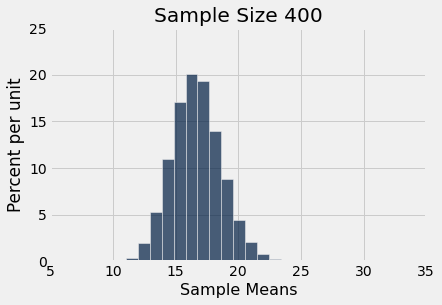

In [80]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.659200319999997
Population SD: 39.480199851609314
SD of sample means: 1.5776712413934335


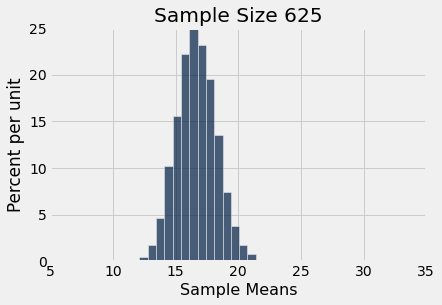

In [81]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

You can see the Central Limit Theorem in action – the histograms of the sample means are roughly normal, even though the histogram of the delays themselves is far from normal.

You can also see that each of the three histograms of the sample means is centered very close to the population mean. In each case, the “average of sample means” is very close to 16.66 minutes, the population mean. Both values are provided in the printout above each histogram. As expected, the sample mean is an unbiased estimate of the population mean.

In [82]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

Let's calcuate and table the SD of 10,000 sample means  from sample sizes in np.arange(25, 626, 25)

In [83]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [84]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
25,7.89956,7.89604
50,5.53636,5.58334
75,4.50431,4.55878
100,3.93096,3.94802
125,3.51879,3.53122
150,3.19399,3.22354
175,2.99305,2.98442
200,2.81997,2.79167
225,2.64929,2.63201
250,2.50317,2.49695


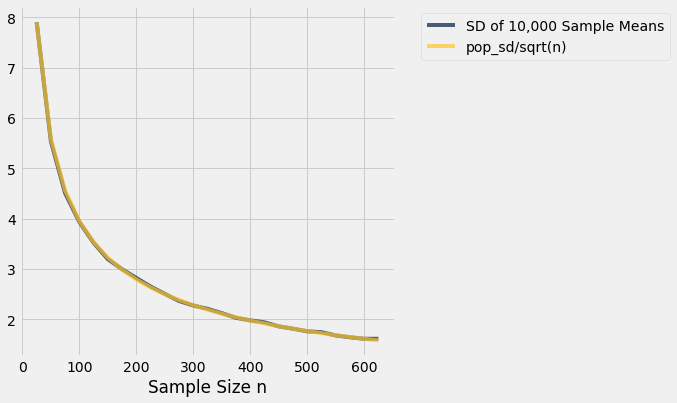

In [85]:
sd_comparison.plot('Sample Size n')

### Central Limit Theorem for the Sample Mean

If you draw a large random sample with replacement from a population, then, regardless of the distribution of the population, the probability distribution of the sample mean is roughly normal, centered at the population mean, with an SD equal to the population SD divided by the square root of the sample size.

If you draw a large random sample with replacement from a population, then, regardless of the distribution of the population, the probability distribution of the sample mean is roughly normal, centered at the population mean, with an SD equal to the population SD divided by the square root of the sample size.

$$ {\mbox{SD of all possible sample means}} ~=~
\frac{\mbox{Population SD}}{\sqrt{\mbox{sample size}}} $$



   * The population size doesn’t affect the accuracy of the sample mean. The population size doesn’t appear anywhere in the formula.

   * The population SD is a constant; it’s the same for every sample drawn from the population. The sample size can be varied. Because the sample size appears in the denominator, the variability of the sample mean decreases as the sample size increases, and hence the accuracy increases.


* In general, when you multiply the sample size by a factor, the accuracy of the sample mean goes up by the square root of that factor.

* So to increase accuracy by a factor of 10, you have to multiply sample size by a factor of 100. Accuracy doesn’t come cheap!

## The Sample Size

Candidate A is contesting an election. A polling organization wants to estimate the proportion of voters who will vote for her. Let’s suppose that they plan to take a simple random sample of voters, though in reality their method of sampling would be more complex. How can they decide how large their sample should be, to get a desired level of accuracy?

We are now in a position to answer this question, after making a few assumptions:

   * The population of voters is very large and that therefore we can just as well assume that the random sample will be drawn with replacement.

   * The polling organization will make its estimate by constructing an approximate 95% confidence interval for the percent of voters who will vote for Candidate A.

   * The desired level of accuracy is that the width of the interval should be no more than 1%. That’s pretty accurate! For example, the confidence interval (33.2%, 34%) would be fine but (33.2%, 35%) would not.

We will work with the sample proportion of voters for Candidate A. Recall that a proportion is a mean, when the values in the population are only 0 (the type of individual you are not counting) or 1 (the type of individual you are counting).

If we had a random sample, we could go about using the bootstrap to construct a confidence interval for the percent of voters for Candidate A. But we don’t have a sample yet – we are trying to find out how big the sample has to be so that our confidence interval is as narrow as we want it to be.

We know that for normally distributed variables, the interval “center +- 2 SDs” contains 95% of the data.

The confidence interval will stretch for 2 SDs of the sample proportion, on either side of the center. So the width of the interval will be 4 SDs of the sample proportion.

We are willing to tolerate a width of 1% = 0.01. So, using the formula developed in the last section:


$$
4 \times \frac{\mbox{SD of the 0-1 population}}{\sqrt{\mbox{sample size}}} ~ \le ~ 0.01 $$

So 

$$ \sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{\mbox{SD of the 0-1 population}}{0.01} $$

If we knew the SD of the population, we’d be done. We could calculate the square root of the sample size, and then take the square to get the sample size. But we don’t know the SD of the population. The population consists of 1 for each voter for Candidate A, and 0 for all other voters, and we don’t know what proportion of each kind there are. That’s what we’re trying to estimate.

So are we stuck? No, because we can bound the SD of the population. 

Let’s calculate the SDs of populations of 10 elements that only consist of 0’s and 1’s, in varying proportions. The function np.ones is useful for this. It takes a positive integer as its argument and returns an array consisting of that many 1’s.

In [86]:
sd = make_array()
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))
    
zero_one_sds = Table().with_columns(
    "Population Proportion of 1's", np.arange(0.1, 1, 0.1),
    "Population SD", sd
)

zero_one_sds

Population Proportion of 1's,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


Not surprisingly, the SD of a population with 10% 1’s and 90% 0’s is the same as that of a population with 90% 1’s and 10% 0’s.  More importantly for our purposes, the SD increases as the proportion of 1’s increases, until the proportion of 1’s is 0.5; then it starts to decrease symmetrically.

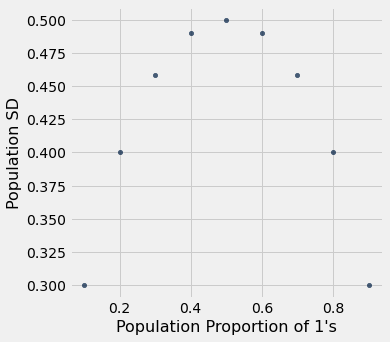

In [87]:
zero_one_sds.scatter("Population Proportion of 1's")

**Summary:** The SD of a population of 1’s and 0’s is at most 0.5. That’s the value of the SD when 50% of the population is coded 1 and the other 50% are coded 0.

We know that:

$$ \sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{\mbox{SD of the 0-1 population}}{0.01}  $$

And that the SD of the 0-1 population is at most 0.5, regardless of the proportion of 1’s in the population. So it is safe to take

$$ \sqrt{\mbox{sample size}} ~ \ge ~ 4 \times \frac{0.5}{0.01} ~=~ 200 $$ 

So the sample size should be at least $200^2 = 40,000$. That’s an enormous sample! But that’s what you need if you want to guarantee great accuracy with high confidence no matter what the population looks like.